<a href="https://colab.research.google.com/github/EinarLop/computational_intelligence_TC3023/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Un padre varios hijos



In [107]:
import numpy as np
import logging
import math

class OPMC:

    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = [np.random.uniform(low=-32.786, high=32.786, size=None), np.random.uniform(low=-32.786, high=32.786, size=None)] 
        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2* math.pi
        d = np.shape(x)[0]
        first_summation = 0
        second_summation = 0

        for i in range(d):
          xi = x[i]
          first_summation += xi**2 
          second_summation += math.cos(c*xi)

        ackley = -a*math.exp(-b* math.sqrt((1/d)*first_summation)) - math.exp((1/d)*second_summation) + a + math.exp(1)
        return ackley

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []
        for i in range(self.n_children):
          current_child = np.clip([self.parent[0] + (-1) ** np.random.randint(0, 2) * np.random.random() , self.parent[1] + (-1) ** np.random.randint(0, 2) * np.random.random()], 0,5)
          children.append(current_child)
        return children 

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
         
            self.parent = children[np.argsort(evaluations)[0]]
   
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter


    algoritmo  experimento  iteracion  \
0        OPMC            1          0   
1        OPMC            1          1   
2        OPMC            1          2   
3        OPMC            1          3   
4        OPMC            1          4   
..        ...          ...        ...   
205      OPMC           10         16   
206      OPMC           10         17   
207      OPMC           10         18   
208      OPMC           10         19   
209      OPMC           10         20   

                                              x    evaluacion         menor  
0    [-22.165375579059322, -13.479864440211262]  2.142348e+01  2.142348e+01  
1                                    [0.0, 0.0]  4.440892e-16  4.440892e-16  
2                                    [0.0, 0.0]  4.440892e-16  4.440892e-16  
3                                    [0.0, 0.0]  4.440892e-16  4.440892e-16  
4                                    [0.0, 0.0]  4.440892e-16  4.440892e-16  
..                                     

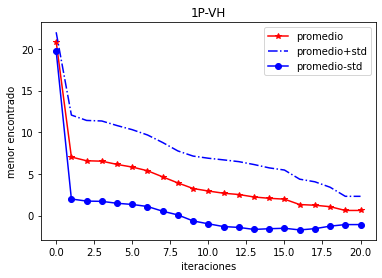

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10

def poner_menor(row):
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
 
    algoritmo = OPMC(iterations=20, n_children=4)

    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones}
    )
    
    # The first row has the lowest value so far.
    df.at[0, 'menor'] = df.loc[0]['evaluacion']

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
#for experimento in range(1, experimentos + 1):
#  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()


# Código Base

In [68]:
import numpy as np
import logging
import math

class UnPadreVariosHijos:

    def __init__(self, iterations=10, n_children=3):
        self.iter = iterations
        self.n_children = n_children
        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = np.random.uniform(low=0.0, high=5.0, size=None)

        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]
        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        print()
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x):
        """
        Function to evaluate a solution.
        """
        return x**3-2*x**2+1


    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children))

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        print("0", self.parent)
        print("1", (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children))
        print("2", self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children))
        children = self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children)
        return np.clip(children, 0, 5)

    def run(self):
        counter = 0
        for _ in range(self.iter):
            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))
            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))
            # Select the children with the lowest evaluation.
            self.parent = children[np.argmin(evaluations)]
            print("3", self.parent)
            print("4", evaluations)
            # Save the best solution of the iteration.
            self.best_iter.append(self.parent)

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent))
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1]))
            counter += 1

        return self.best_iter



0 4.3551563352664395
1 [0.52881073 0.77718986 0.36664296 0.2946066 ]
2 [3.98149881 3.60698639 4.01961703 3.49564808]
3 3.4060606180880857
4 [22.104732097000568, 29.3188417323991, 17.312059246861168, 35.81153211517468]
0 3.4060606180880857
1 [0.27013393 0.02535672 0.24934642 0.30900184]
2 [3.18461822 2.54978004 2.66024807 3.12033333]
3 3.796452591284691
4 [27.48877565140265, 35.56852694139662, 26.892365112905313, 37.62456426472529]
0 3.796452591284691
1 [0.25781755 0.34069494 0.15899094 0.78267564]
2 [4.22278165 4.26153717 3.94997408 3.90901412]
3 2.8443707661429953
4 [22.107909574491988, 7.831335289772088, 16.449513982673942, 26.37856101515921]
0 2.8443707661429953
1 [-0.59323068 -0.7529481  -0.933477   -0.05985114]
2 [3.776544   3.6409992  3.15770124 2.97063185]
3 3.0481437792091937
4 [10.73849304125541, 13.760989014781366, 12.778267261571386, 17.211603818844274]
0 3.0481437792091937
1 [-0.61544383 -0.62120662 -0.40619947 -0.71751306]
2 [3.18126716 3.09788458 3.53421116 3.47861058]
3

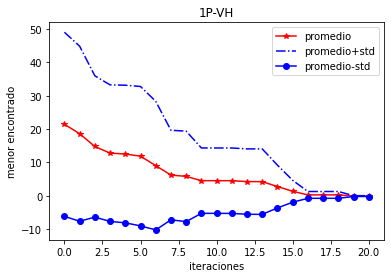

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10

def poner_menor(row):
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
    algoritmo = UnPadreVariosHijos(iterations=20, n_children=4)
    

    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones}
    )
    
    # The first row has the lowest value so far.
    df.at[0, 'menor'] = df.loc[0]['evaluacion']

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
#for experimento in range(1, experimentos + 1):
#  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()
